In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
listing = pd.read_csv("Listings.csv", encoding = "ISO-8859-1", low_memory= False)

In [36]:
listing.head()

,listing_id,name,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,...,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
0,281420,"Beautiful Flat in le Village Montmartre, Paris",1466919,2011-12-03,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
1,3705183,39 mÃÂ² Paris (Sacre CÃ âur),10328771,2013-11-29,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
2,4082273,"Lovely apartment with Terrace, 60m2",19252768,2014-07-31,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
3,4797344,Cosy studio (close to Eiffel tower),10668311,2013-12-17,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
4,4823489,Close to Eiffel Tower - Beautiful flat : 2 rooms,24837558,2014-12-14,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f


In [37]:
listing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279712 entries, 0 to 279711
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   listing_id                   279712 non-null  int64  
 1   name                         279537 non-null  object 
 2   host_id                      279712 non-null  int64  
 3   host_since                   279547 non-null  object 
 4   host_location                278872 non-null  object 
 5   host_response_time           150930 non-null  object 
 6   host_response_rate           150930 non-null  float64
 7   host_acceptance_rate         166625 non-null  float64
 8   host_is_superhost            279547 non-null  object 
 9   host_total_listings_count    279547 non-null  float64
 10  host_has_profile_pic         279547 non-null  object 
 11  host_identity_verified       279547 non-null  object 
 12  neighbourhood                279712 non-null  object 
 13 

In [38]:
listing["host_since"] = pd.to_datetime(listing["host_since"])
listing.info()                                  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279712 entries, 0 to 279711
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   listing_id                   279712 non-null  int64         
 1   name                         279537 non-null  object        
 2   host_id                      279712 non-null  int64         
 3   host_since                   279547 non-null  datetime64[ns]
 4   host_location                278872 non-null  object        
 5   host_response_time           150930 non-null  object        
 6   host_response_rate           150930 non-null  float64       
 7   host_acceptance_rate         166625 non-null  float64       
 8   host_is_superhost            279547 non-null  object        
 9   host_total_listings_count    279547 non-null  float64       
 10  host_has_profile_pic         279547 non-null  object        
 11  host_identity_verified    

### Filtering the dataset to where city =  Paris

In [42]:
paris_listing = listing.query("city == 'Paris'")
paris_listing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64690 entries, 0 to 279711
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   listing_id                   64690 non-null  int64         
 1   name                         64627 non-null  object        
 2   host_id                      64690 non-null  int64         
 3   host_since                   64657 non-null  datetime64[ns]
 4   host_location                64522 non-null  object        
 5   host_response_time           23346 non-null  object        
 6   host_response_rate           23346 non-null  float64       
 7   host_acceptance_rate         31919 non-null  float64       
 8   host_is_superhost            64657 non-null  object        
 9   host_total_listings_count    64657 non-null  float64       
 10  host_has_profile_pic         64657 non-null  object        
 11  host_identity_verified       64657 non-null  

In [44]:
paris_listing.shape

(64690, 33)

In [49]:
paris_listing = (listing
    .query("city == 'Paris'")
    .loc[:, ["host_since", "neighbourhood", "city", "accommodates", "price"]]
        )
paris_listing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64690 entries, 0 to 279711
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   host_since     64657 non-null  datetime64[ns]
 1   neighbourhood  64690 non-null  object        
 2   city           64690 non-null  object        
 3   accommodates   64690 non-null  int64         
 4   price          64690 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 3.0+ MB


In [50]:
paris_listing.isnull().sum()

host_since       33
neighbourhood     0
city              0
accommodates      0
price             0
dtype: int64

In [51]:
paris_listing.describe()

,host_since,accommodates,price
count,64657,64690.000000,64690.000000
mean,2015-11-01 11:06:05.528867584,3.037997,113.096445
min,2008-08-30 00:00:00,0.000000,0.000000
25%,2014-03-09 00:00:00,2.000000,59.000000
50%,2015-07-07 00:00:00,2.000000,80.000000
75%,2017-05-29 00:00:00,4.000000,120.000000
max,2021-02-07 00:00:00,16.000000,12000.000000
std,NaN,1.588766,214.433668


In [57]:
paris_listing.query("accommodates == 0")

,host_since,neighbourhood,city,accommodates,price
98209,2020-07-20,Pantheon,Paris,0,0
203257,2020-02-04,Batignolles-Monceau,Paris,0,0
203258,2016-10-17,Opera,Paris,0,0
203259,2020-04-24,Luxembourg,Paris,0,0
203260,2020-04-24,Vaugirard,Paris,0,0
203261,2020-07-15,Batignolles-Monceau,Paris,0,0
203263,2016-06-07,Palais-Bourbon,Paris,0,0
203264,2020-09-08,Pantheon,Paris,0,0
203265,2020-09-21,Vaugirard,Paris,0,0
203267,2020-10-29,Observatoire,Paris,0,0


In [58]:
paris_listing.query("accommodates == 0").count()

host_since       54
neighbourhood    54
city             54
accommodates     54
price            54
dtype: int64

In [59]:
paris_listing.query("price == 0").count()

host_since       62
neighbourhood    62
city             62
accommodates     62
price            62
dtype: int64

In [60]:
paris_listing.query("price == 0" and "accommodates == 0").count()

host_since       54
neighbourhood    54
city             54
accommodates     54
price            54
dtype: int64

#### This shows that anytime accommodate is 0 then the price is also 0

In [66]:
paris_listing_neighbourhood = (
    
    paris_listing
    .groupby("neighbourhood")
    .agg({"price" : "mean"})
    .sort_values("price")
    
)

paris_listing_neighbourhood.head()

,price
neighbourhood,
Menilmontant,74.942257
Buttes-Chaumont,82.690182
Buttes-Montmartre,87.209479
Reuilly,89.058402
Popincourt,90.559459


In [68]:
paris_listing_neighbourhood = (
    
    paris_listing
    .groupby("neighbourhood")
    .agg({"price" : "mean"})
    .sort_values("price")
    
)

paris_listing_neighbourhood.tail()

,price
neighbourhood,
Luxembourg,155.638639
Palais-Bourbon,156.856578
Passy,161.144635
Louvre,175.379972
Elysee,210.536765


In [70]:
paris_listing_accommodates = (
    
    paris_listing
    .query("neighbourhood == 'Elysee'")
    .groupby("accommodates")
    .agg({"price" : "mean"})
    .sort_values("price")
    
)

paris_listing_accommodates.head()

,price
accommodates,
0,0.000000
1,79.522222
3,152.828767
2,155.103352
4,212.096070


In [72]:
paris_listing_accommodates = (
    
    paris_listing
    .query("neighbourhood == 'Elysee'")
    .groupby("accommodates")
    .agg({"price" : "mean"})
    .sort_values("price")
    
)

paris_listing_accommodates.tail()

,price
accommodates,
12,529.625
16,800.000
11,805.000
13,842.500
14,971.000


### Create a table called paris_listings_over_time grouped by the ‘host_since’ year, and calculate the average price and count of rows representing the number of new hosts

In [75]:
paris_listing_overtime = (

    paris_listing
    .set_index("host_since")
    .resample("Y")
    .agg({"neighbourhood" : "count" ,"price" : "mean"})

)

paris_listing_overtime.head()

,neighbourhood,price
host_since,,
2008-12-31,4,77.750000
2009-12-31,106,159.641509
2010-12-31,416,125.031250
2011-12-31,1339,124.828230
2012-12-31,4592,111.578615


In [76]:
paris_listing_overtime = (

    paris_listing
    .set_index("host_since")
    .resample("Y")
    .agg({"neighbourhood" : "count" ,"price" : "mean"})

)

paris_listing_overtime.tail()

,neighbourhood,price
host_since,,
2017-12-31,4585,108.658888
2018-12-31,4294,138.209362
2019-12-31,5694,129.757113
2020-12-31,3412,141.456038
2021-12-31,133,93.488722


### Visualize the data and summarize findings
Your final objective is to build visuals to show the number of new hosts by year, overall average price by year and neighborhood, and average price for various types of listings in Paris' most expensive neighborhood.

### 
Create a horizontal bar chart of the average price by neighborhood in Paris, and make sure to add a title and change axis labels as needed


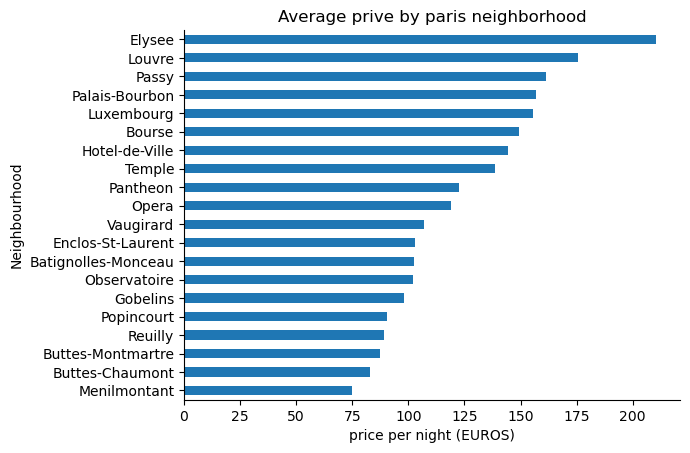

In [88]:
(paris_listing_neighbourhood
    .plot
    .barh(title = "Average prive by paris neighborhood",
          xlabel = "price per night (EUROS)",
          ylabel = "Neighbourhood",
          legend = None
         ) #bar()
)
sns.despine()

### 
Create a horizontal bar chart of the average price by ‘accommodates’ in Paris’ most expensive neighborhood, and make sure to add a title and change axis labels as needed


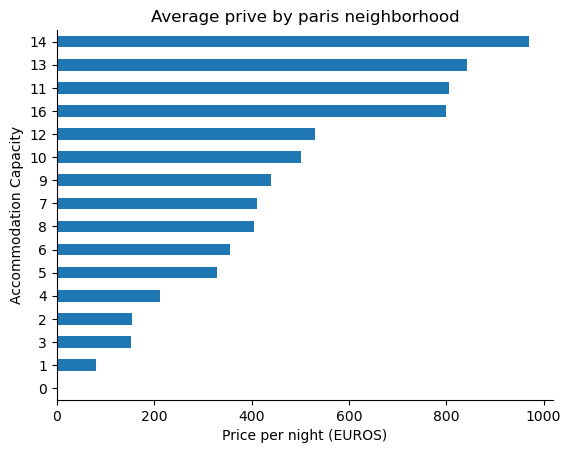

In [90]:
(paris_listing_accommodates
    .plot
    .barh(title = "Average prive by paris neighborhood",
          xlabel = "Price per night (EUROS)",
          ylabel = "Accommodation Capacity",
          legend = None
         ) #bar()
)
sns.despine()

###
Create two line charts: one showing the count of new hosts over time, and one showing average price. Set the y-axis limit to 0, add a title, and change axis labels as needed


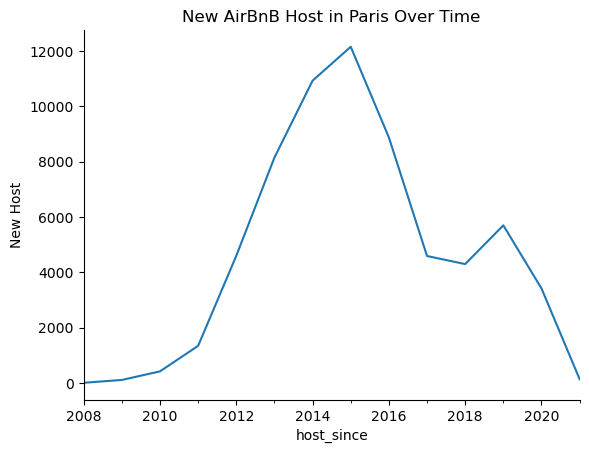

In [100]:
paris_listing_overtime["neighbourhood"].plot(
    ylabel = "New Host",
    title = "New AirBnB Host in Paris Over Time"
    ) 
sns.despine()

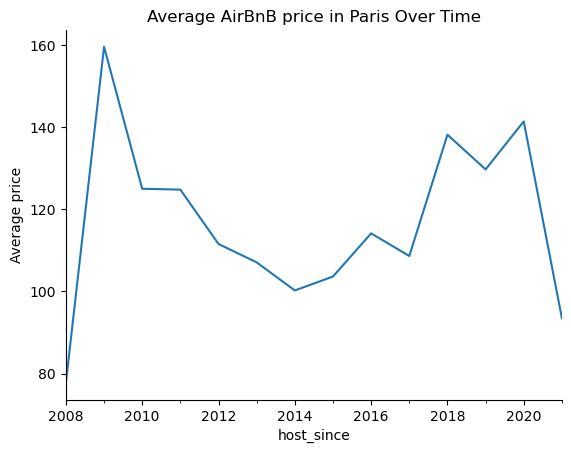

In [101]:
paris_listing_overtime["price"].plot(
    ylabel = "Average price",
    title = "Average AirBnB price in Paris Over Time"
    ) 
sns.despine()

###
Based on your findings, what insights do you have about the impact of the 2015 regulations on new hosts and prices?

Text(0.5, 1.0, '2015 Regualtion Leads to Fewer New Host, Higher Prices')

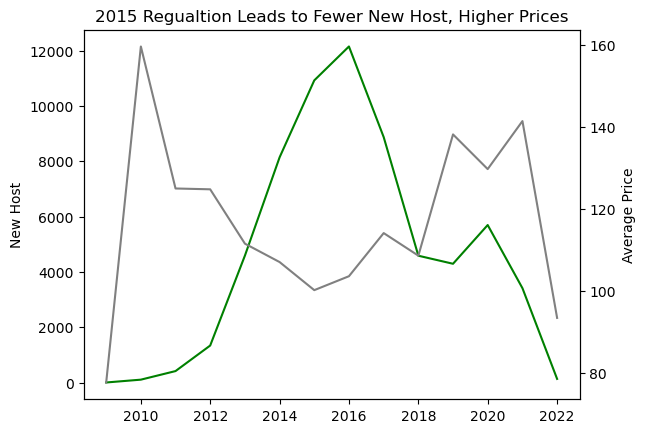

In [113]:
fig, ax = plt.subplots()

ax.plot(paris_listing_overtime.index,
    paris_listing_overtime["neighbourhood"],
    label = "New Host",
    c = "green"
    )
ax.set_ylabel ("New Host")

ax2 = plt.twinx()

ax2.plot(paris_listing_overtime.index,
    paris_listing_overtime["price"],
    label = "Average Price",
    c = "grey"
    )
ax2.set_ylabel ("Average Price")
ax.set_title ("2015 Regualtion Leads to Fewer New Host, Higher Prices")